In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# it will show all columns itself in editor
pd.set_option('display.max_columns',None)

In [3]:
# Loading  dataset
df_csv=pd.read_csv('po2_data.csv')

In [4]:
# Loading  dataset
df_txt=pd.read_csv('po1_data.txt',names=['Subject identifier','jitter(%)','jitter(abs)','jitter(rap)','jitter(ppq5)','jitter(ddp)','shimmer(%)','shimmer(abs)','shimmer(apq3)','shimmer(apq5)','shimmer(apq11)','shimmer(dda)','Autocorrelation between NHR and HNR','nhr','hnr','Median pitch',
                                          'Mean pitch','Standard deviation of pitch','Minimum pitch','Maximum pitch','Number of pulses','Number of periods','Mean period','Standard deviation of period',
                                          'Fraction of unvoiced frames','Number of voice breaks','Degree of voice breaks','The Unified Parkinson','PD indicator'])

In [5]:
#reading top 5 data
df_txt.head()

,Subject identifier,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),Autocorrelation between NHR and HNR,nhr,hnr,Median pitch,Mean pitch,Standard deviation of pitch,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of unvoiced frames,Number of voice breaks,Degree of voice breaks,The Unified Parkinson,PD indicator
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.911508,0.109983,12.212,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [6]:
colm=[]
for i in df_csv.columns:
    if i in df_txt.columns:
        colm.append(i)

In [7]:
df_csv.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe'],
      dtype='object')

In [8]:
colm

['jitter(%)',
 'jitter(abs)',
 'jitter(rap)',
 'jitter(ppq5)',
 'jitter(ddp)',
 'shimmer(%)',
 'shimmer(abs)',
 'shimmer(apq3)',
 'shimmer(apq5)',
 'shimmer(apq11)',
 'shimmer(dda)',
 'nhr',
 'hnr']

In [9]:
df_txt['The Unified Parkinson'].value_counts()

The Unified Parkinson
1     520
5      78
23     52
40     52
46     52
32     52
8      26
16     26
20     26
11     26
12     26
24     26
31     26
55     26
26     26
Name: count, dtype: int64

In [11]:
UPDRS=df_txt['The Unified Parkinson']

In [13]:
df_txt=df_txt[colm]

In [15]:
df_txt['UPDRS']=UPDRS

In [16]:
df_txt

,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,UPDRS
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.119116,11.130,23
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.066758,17.403,23
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.109983,12.212,23
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.121982,11.384,23
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.236831,10.653,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,13.780,0.430569,6.798,1
1036,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,8.160,0.160787,11.216,1
1037,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,19.300,0.161736,11.035,1
1038,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,19.123,0.423034,6.583,1


In [17]:
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   jitter(%)       1040 non-null   float64
 1   jitter(abs)     1040 non-null   float64
 2   jitter(rap)     1040 non-null   float64
 3   jitter(ppq5)    1040 non-null   float64
 4   jitter(ddp)     1040 non-null   float64
 5   shimmer(%)      1040 non-null   float64
 6   shimmer(abs)    1040 non-null   float64
 7   shimmer(apq3)   1040 non-null   float64
 8   shimmer(apq5)   1040 non-null   float64
 9   shimmer(apq11)  1040 non-null   float64
 10  shimmer(dda)    1040 non-null   float64
 11  nhr             1040 non-null   float64
 12  hnr             1040 non-null   float64
 13  UPDRS           1040 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 113.9 KB


## Ecploratory data analysis on po2_data.csv data

In [22]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap)     5875 non-null   float64
 9   jitter(ppq5)    5875 non-null   float64
 10  jitter(ddp)     5875 non-null   float64
 11  shimmer(%)      5875 non-null   float64
 12  shimmer(abs)    5875 non-null   float64
 13  shimmer(apq3)   5875 non-null   float64
 14  shimmer(apq5)   5875 non-null   float64
 15  shimmer(apq11)  5875 non-null   float64
 16  shimmer(dda)    5875 non-null   float64
 17  nhr             5875 non-null   f

In [23]:
# for find missing values
df_csv.isnull().sum()

subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64

In [24]:
#checking duplicate rows in dataset
print(f"Number of duplicate rows in Data set: {df_csv.duplicated().sum()}")

0

In [ ]:
#exploring cateogrical features in dataset
cat_fet=[feature for feature in df_csv.columns if ((df_csv[feature].dtypes=='O'))]
print('Number of cateogrical variables in Dataset: ', len(cat_fet))
cat_fet

In [ ]:
# exploring  numerical features
numerical_features = [feature for feature in df_csv.columns if ((df_csv[feature].dtypes != 'O'))]
print('Number of numerical variables in  Dataset: ', len(numerical_features))
numerical_features

In [ ]:
#exploring discrete numerical features
discrete_feature=[feature for feature in numerical_features if len(df_csv[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
#exploring continous numerical features
continuous_features=[feature for feature in numerical_features if len(df_csv[feature].unique())>25]
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

In [ ]:
#  df_csv is DataFrame
data = []

for i in df_csv.columns:
    data.append([i, df_csv[i].nunique()])

result_df = pd.DataFrame(data, columns=['Feature', 'Unique Categories'])
print(result_df)

### Distribution of the po2_data.csv dataset

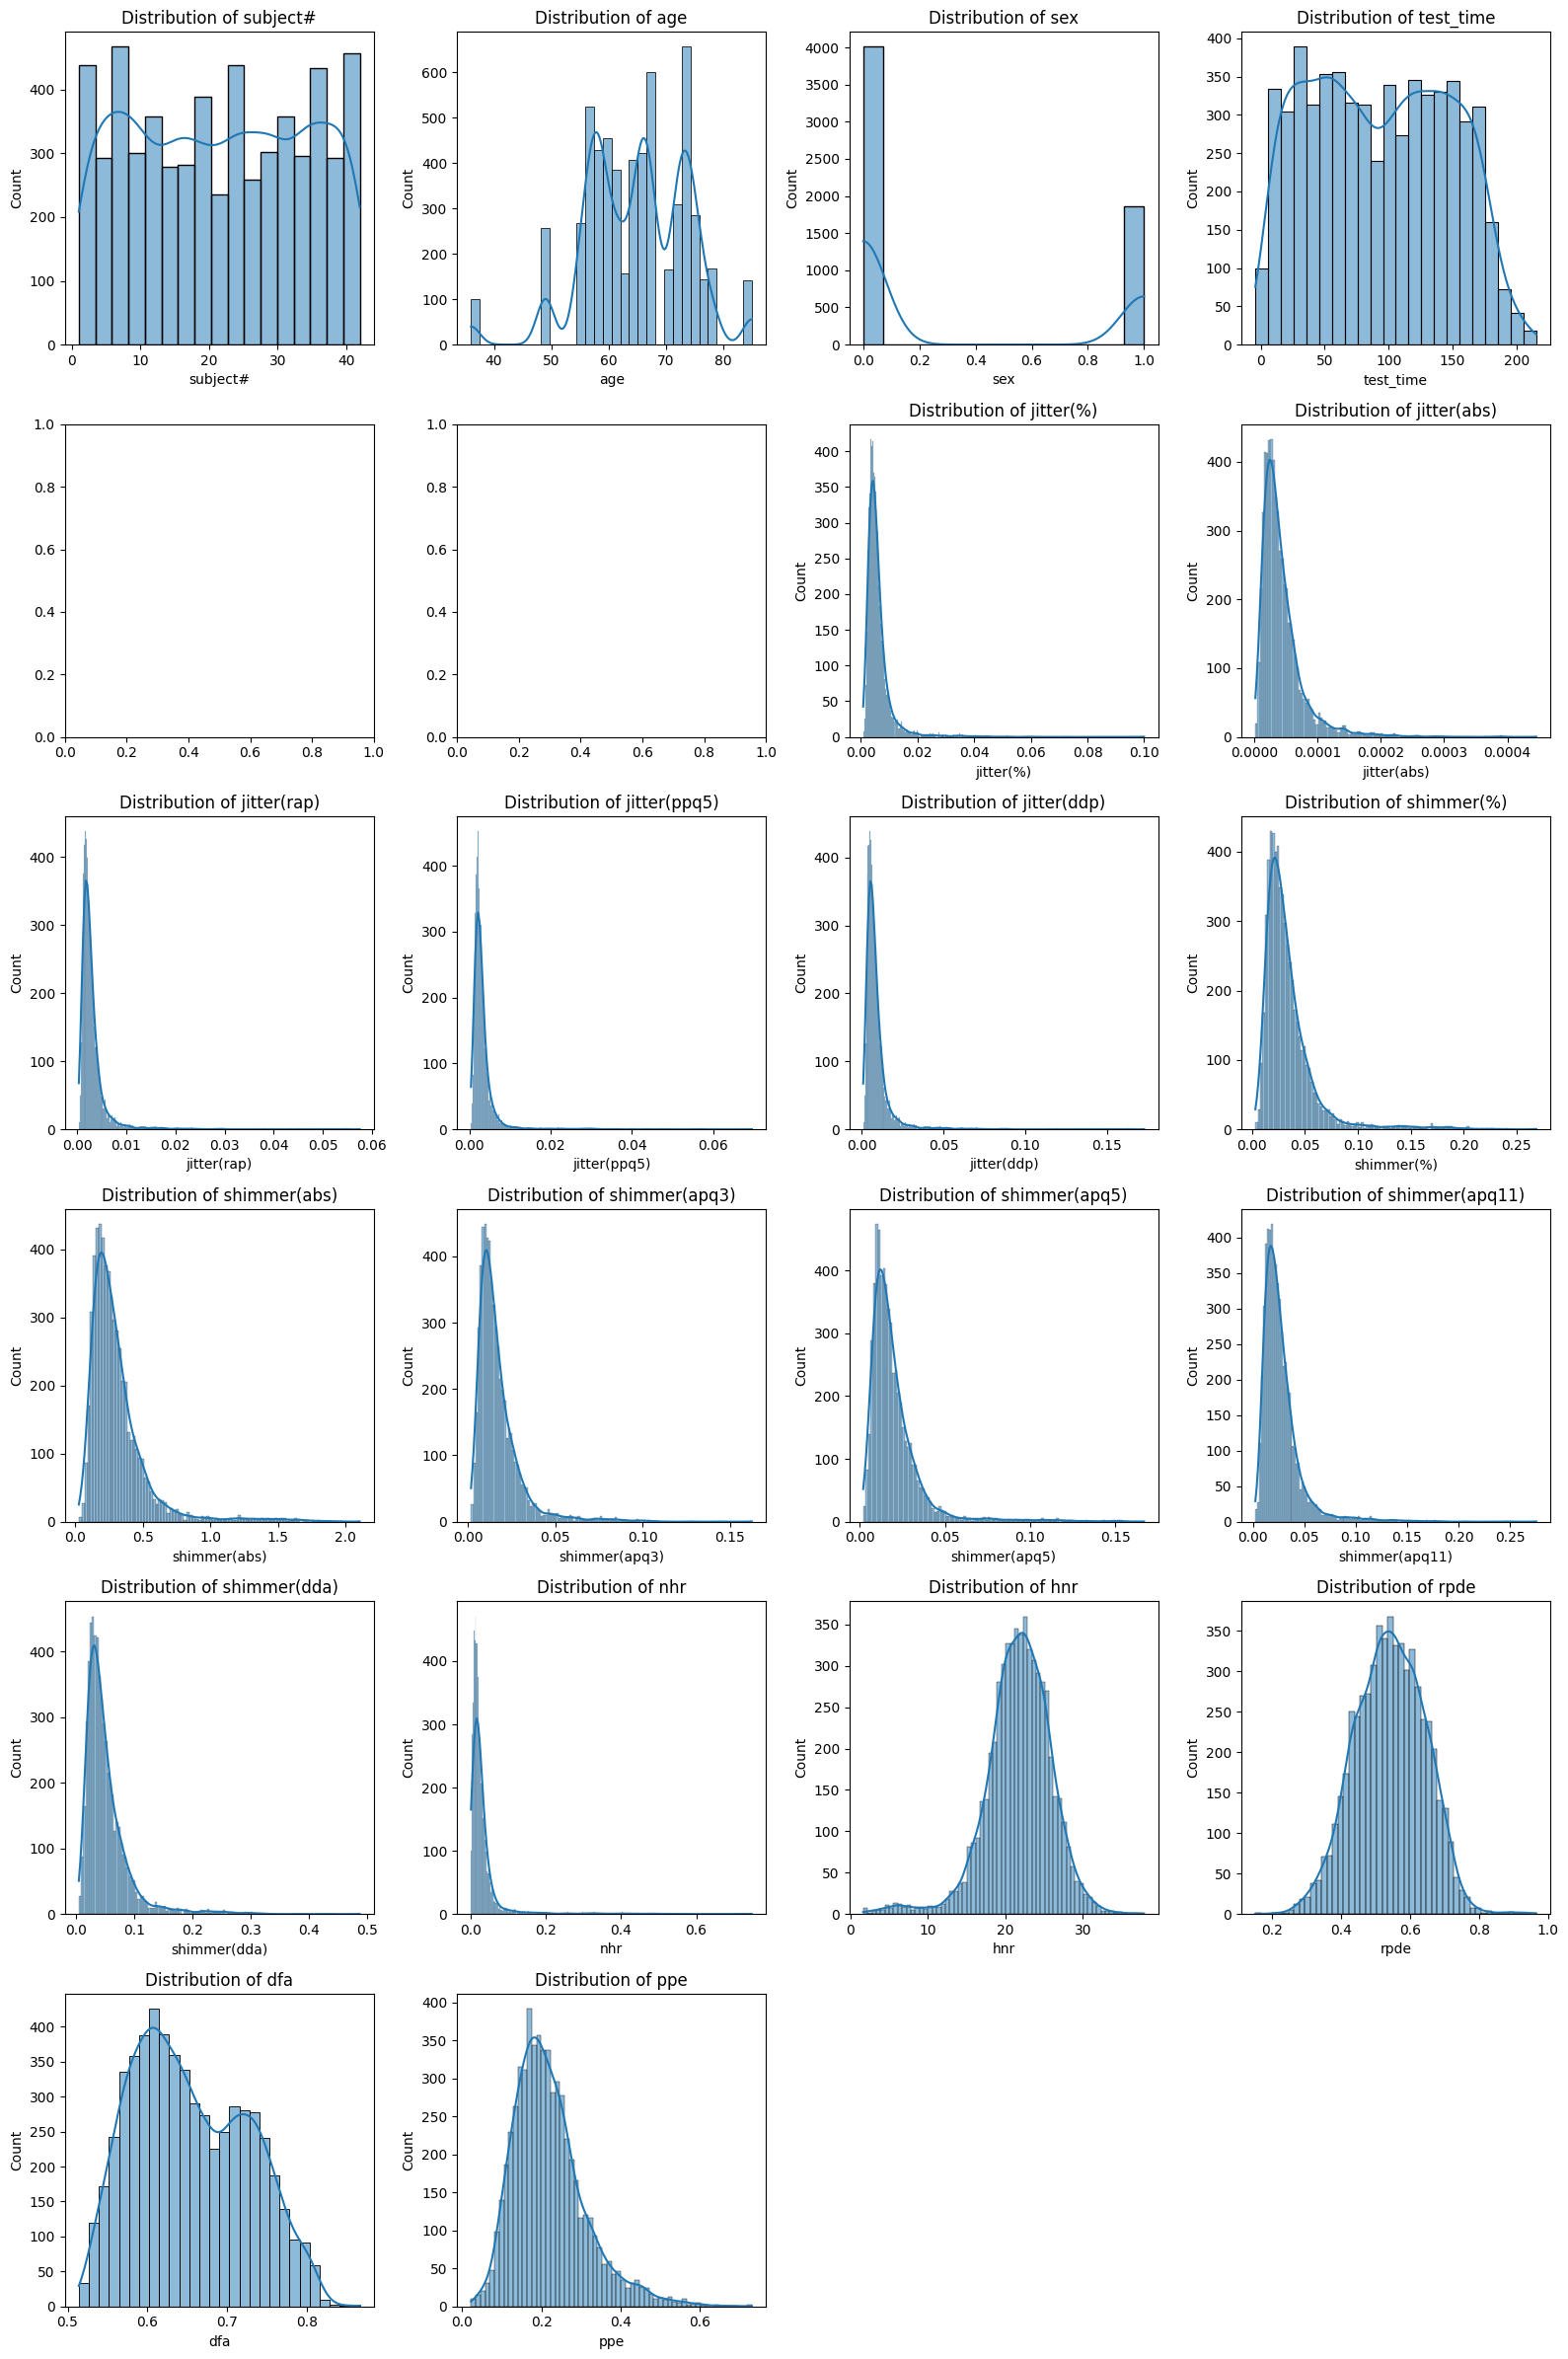

In [194]:
num_plots_per_row = 4

# Calculate the number of rows required for subplots
num_rows = (len(df_csv.columns) - 1) // num_plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(16, 4 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot its distribution
for i, col in enumerate(df_csv.columns):
    if col not in ['motor_updrs','total_updrs']:  # Exclude the target variable 'motor_updrs' for plotting
        sns.histplot(data=df_csv, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

# Remove any empty subplots
if len(df_csv.columns) % num_plots_per_row != 0:
    for i in range(len(df_csv.columns), num_rows * num_plots_per_row):
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
df_csv.corr()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,0.146202,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,0.058736,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_updrs,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,0.102349,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_updrs,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
jitter(abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
jitter(rap),0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
jitter(ppq5),0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


### heatmap for correlation plot

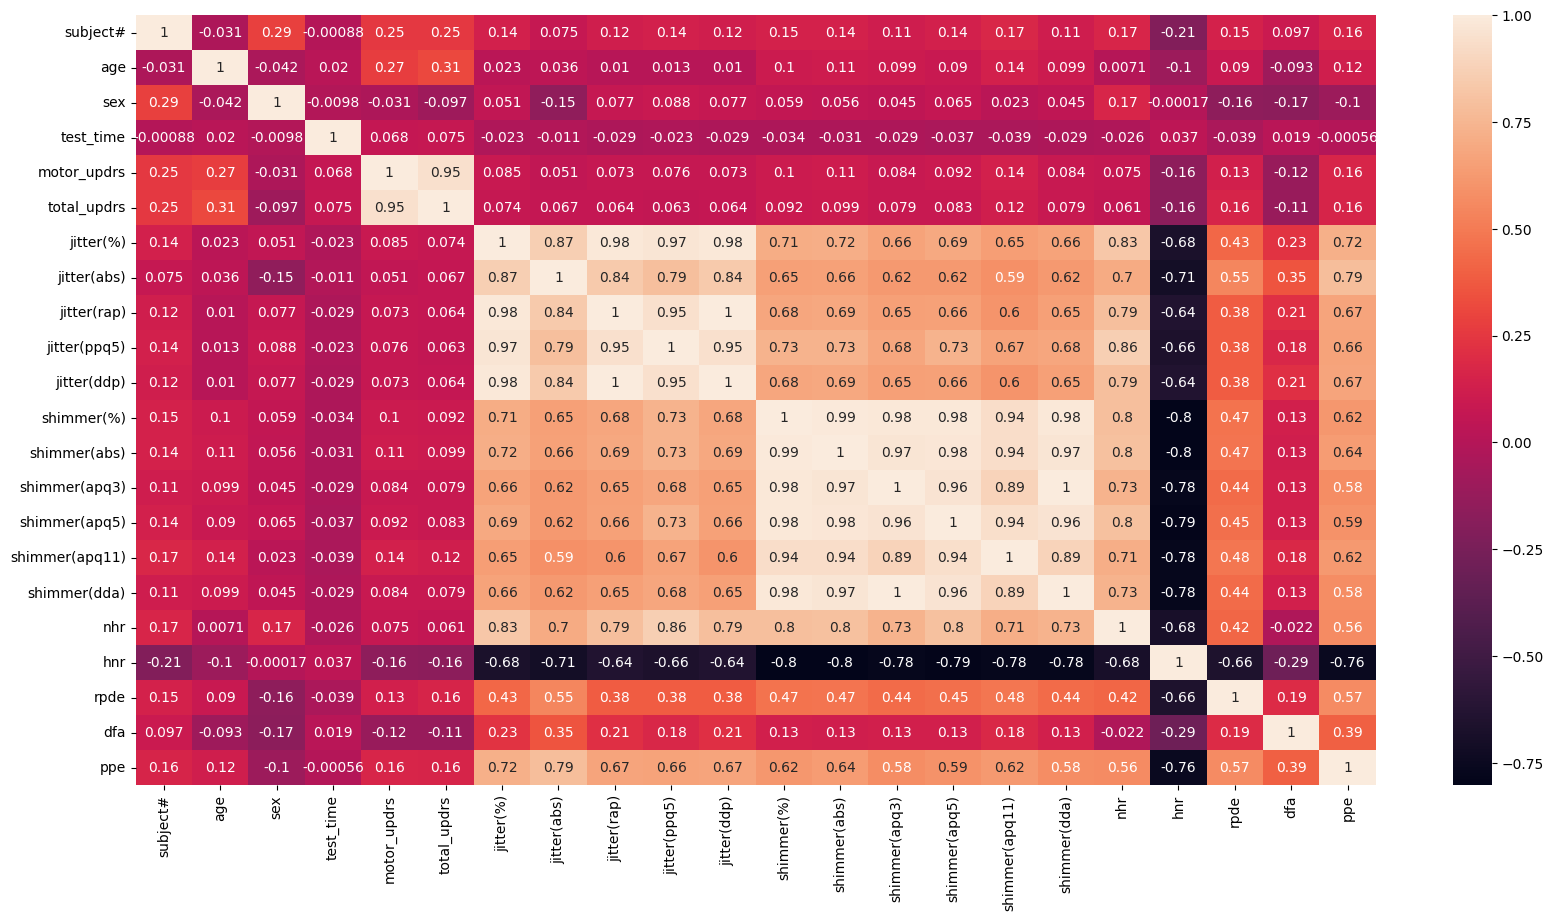

In [196]:
plt.figure(figsize=(20,10))
sns.heatmap(df_csv.corr(),annot=True)
plt.show()

### Box plot for po2_data.csv dataset

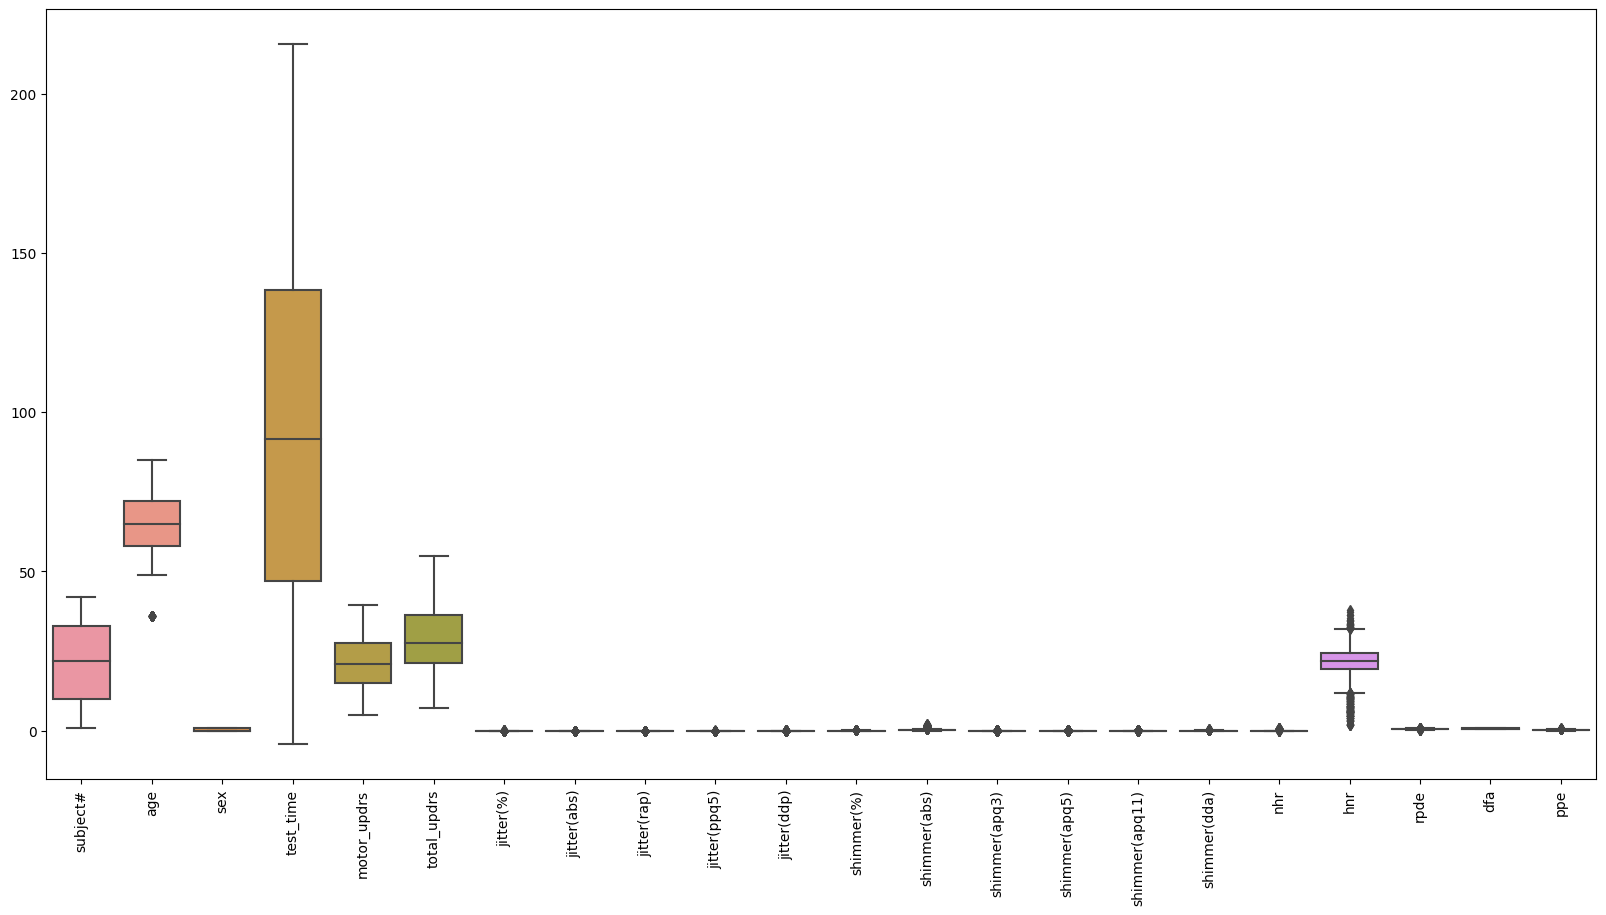

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(df_csv)
plt.xticks(rotation=90)
plt.show()


In [87]:
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_updrs,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_updrs,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
jitter(abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
jitter(rap),5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
jitter(ppq5),5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


### Scatter plot of motor_updrs vs. total_updrs

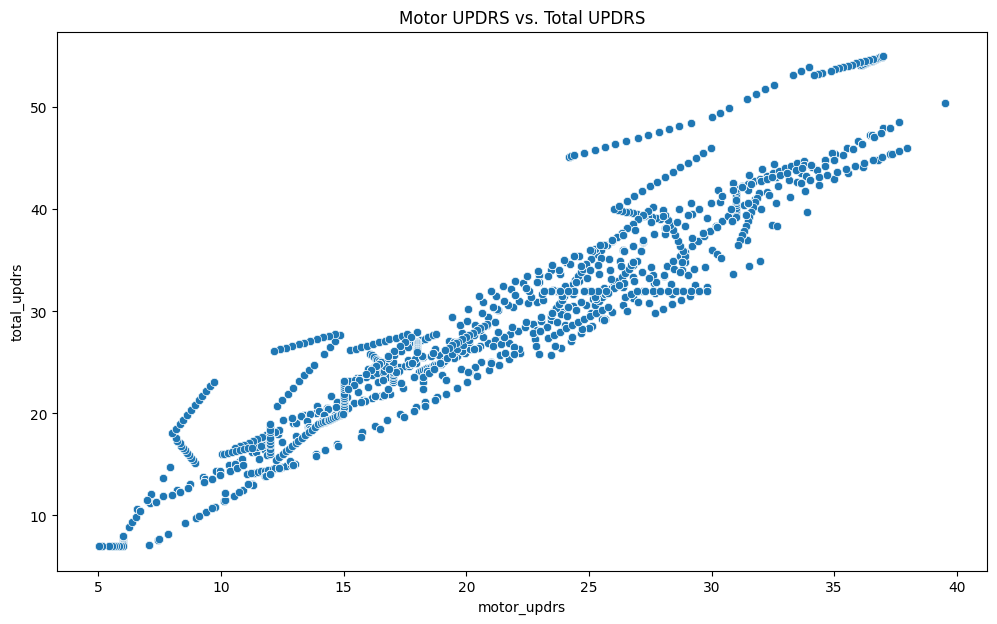

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_csv, x='motor_updrs', y='total_updrs')
plt.title('Motor UPDRS vs. Total UPDRS')
plt.show()

### Bar chart of gender vs. average motor_updrs

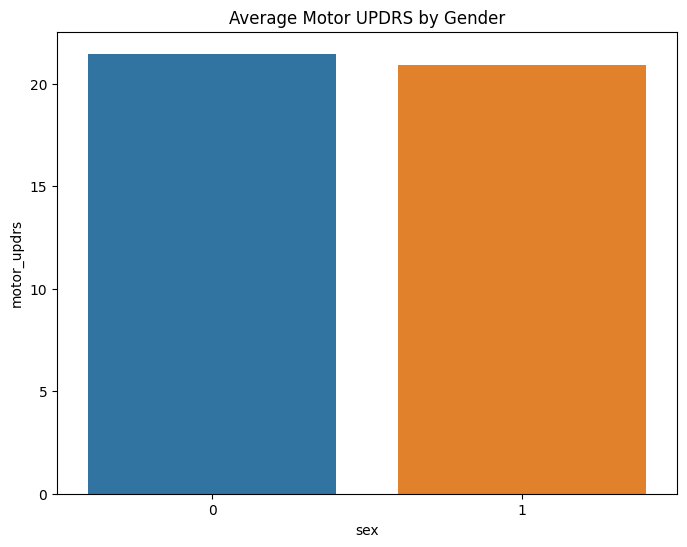

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_csv, x='sex', y='motor_updrs', ci=None)
plt.title('Average Motor UPDRS by Gender')
plt.show()

### Distribution plot of age by gender

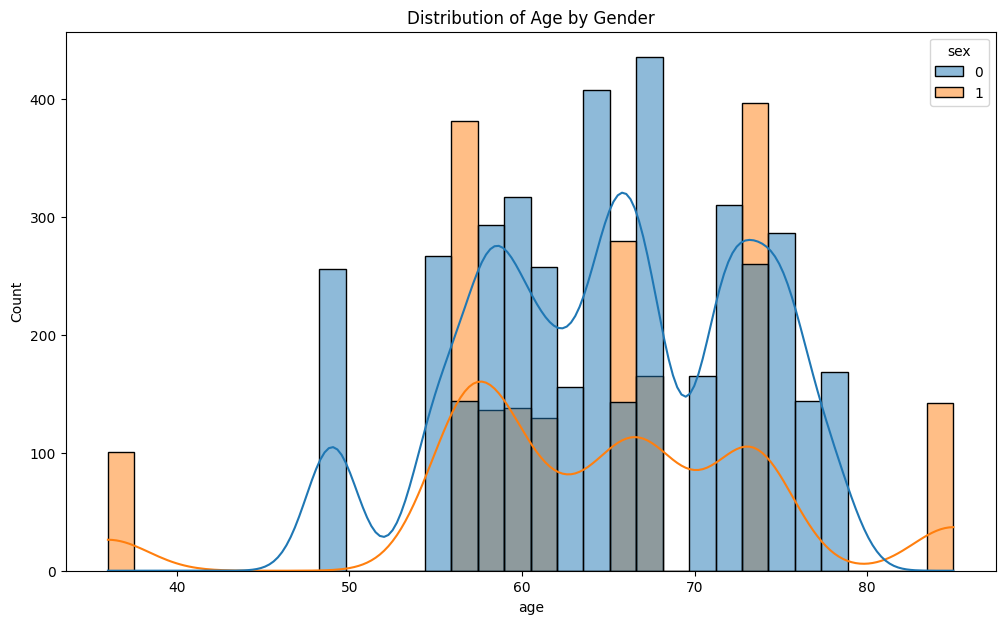

In [198]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_csv, x='age', hue='sex', kde=True)
plt.title('Distribution of Age by Gender')
plt.show()

In [50]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap)     5875 non-null   float64
 9   jitter(ppq5)    5875 non-null   float64
 10  jitter(ddp)     5875 non-null   float64
 11  shimmer(%)      5875 non-null   float64
 12  shimmer(abs)    5875 non-null   float64
 13  shimmer(apq3)   5875 non-null   float64
 14  shimmer(apq5)   5875 non-null   float64
 15  shimmer(apq11)  5875 non-null   float64
 16  shimmer(dda)    5875 non-null   float64
 17  nhr             5875 non-null   f

### distribution of the target features

### Create subplots for UPDRS score distributions

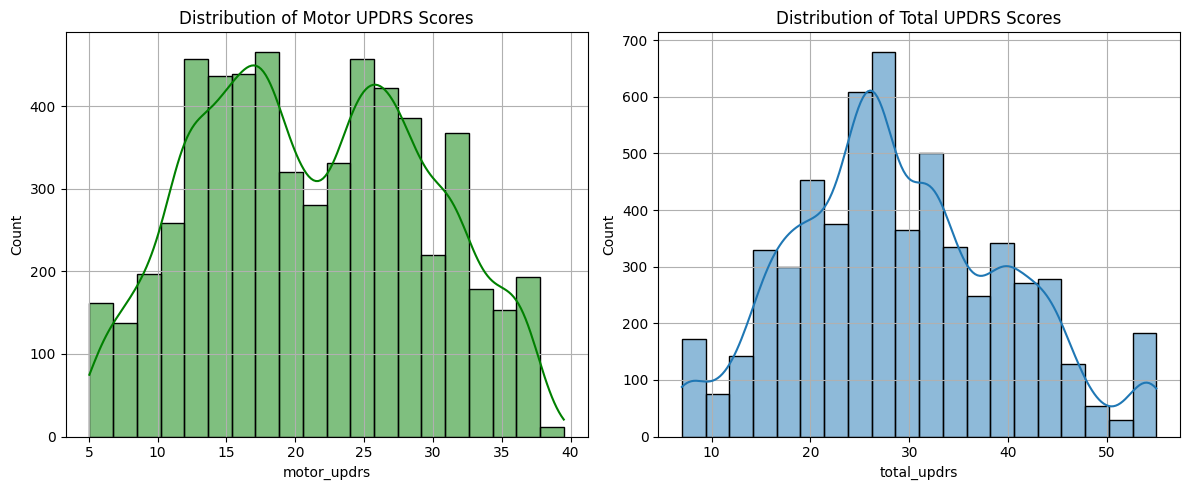

In [202]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_csv['motor_updrs'], bins=20, kde=True,color='green')
plt.title('Distribution of Motor UPDRS Scores')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(df_csv['total_updrs'], bins=20, kde=True)
plt.title('Distribution of Total UPDRS Scores')
plt.grid(True)

plt.tight_layout()
plt.show()

### Gender distribution

In [61]:
df_csv['sex'].value_counts()

sex
0    4008
1    1867
Name: count, dtype: int64

### Create a pie chart

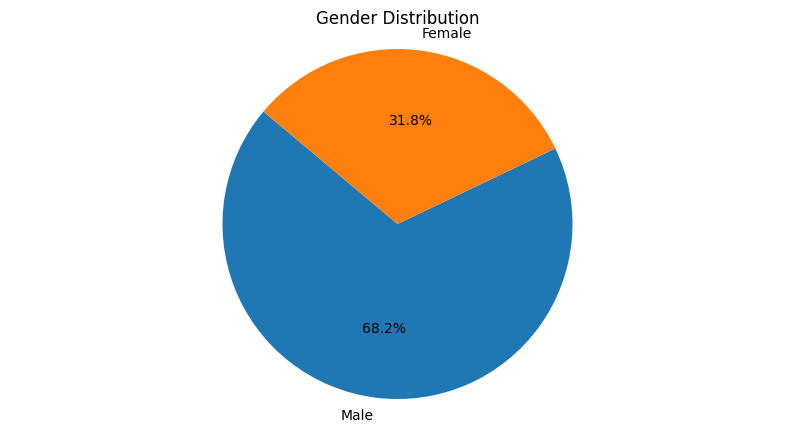

In [204]:
plt.figure(figsize=(10,5))
plt.pie(df_csv['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Scatter plot of shimmer(%) vs. jitter(%)

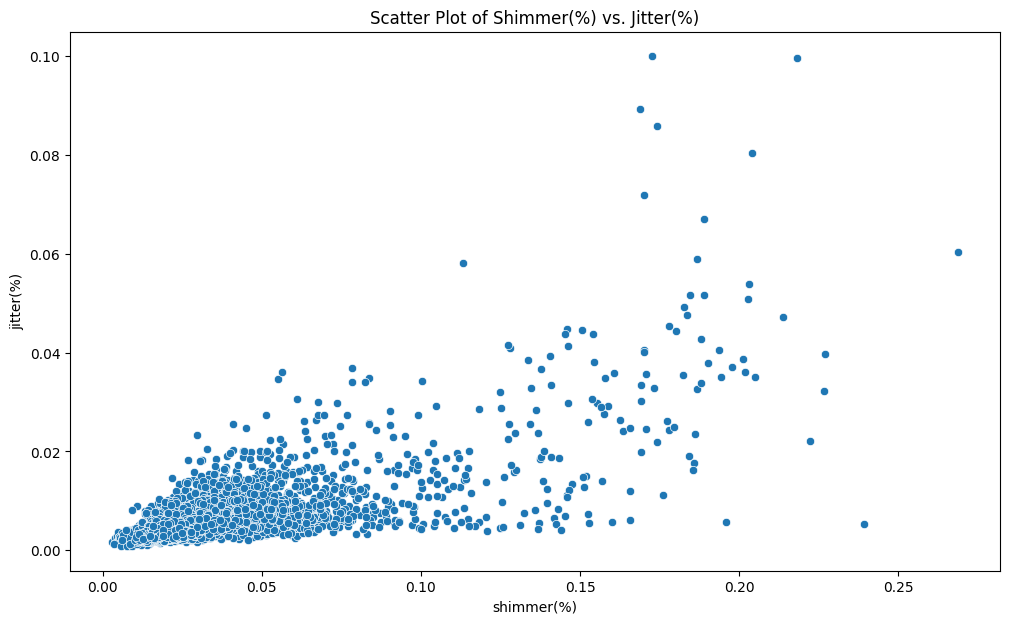

In [60]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_csv, x='shimmer(%)', y='jitter(%)')
plt.title('Scatter Plot of Shimmer(%) vs. Jitter(%)')
plt.show()

### Pairwise scatter plots with hue for gender

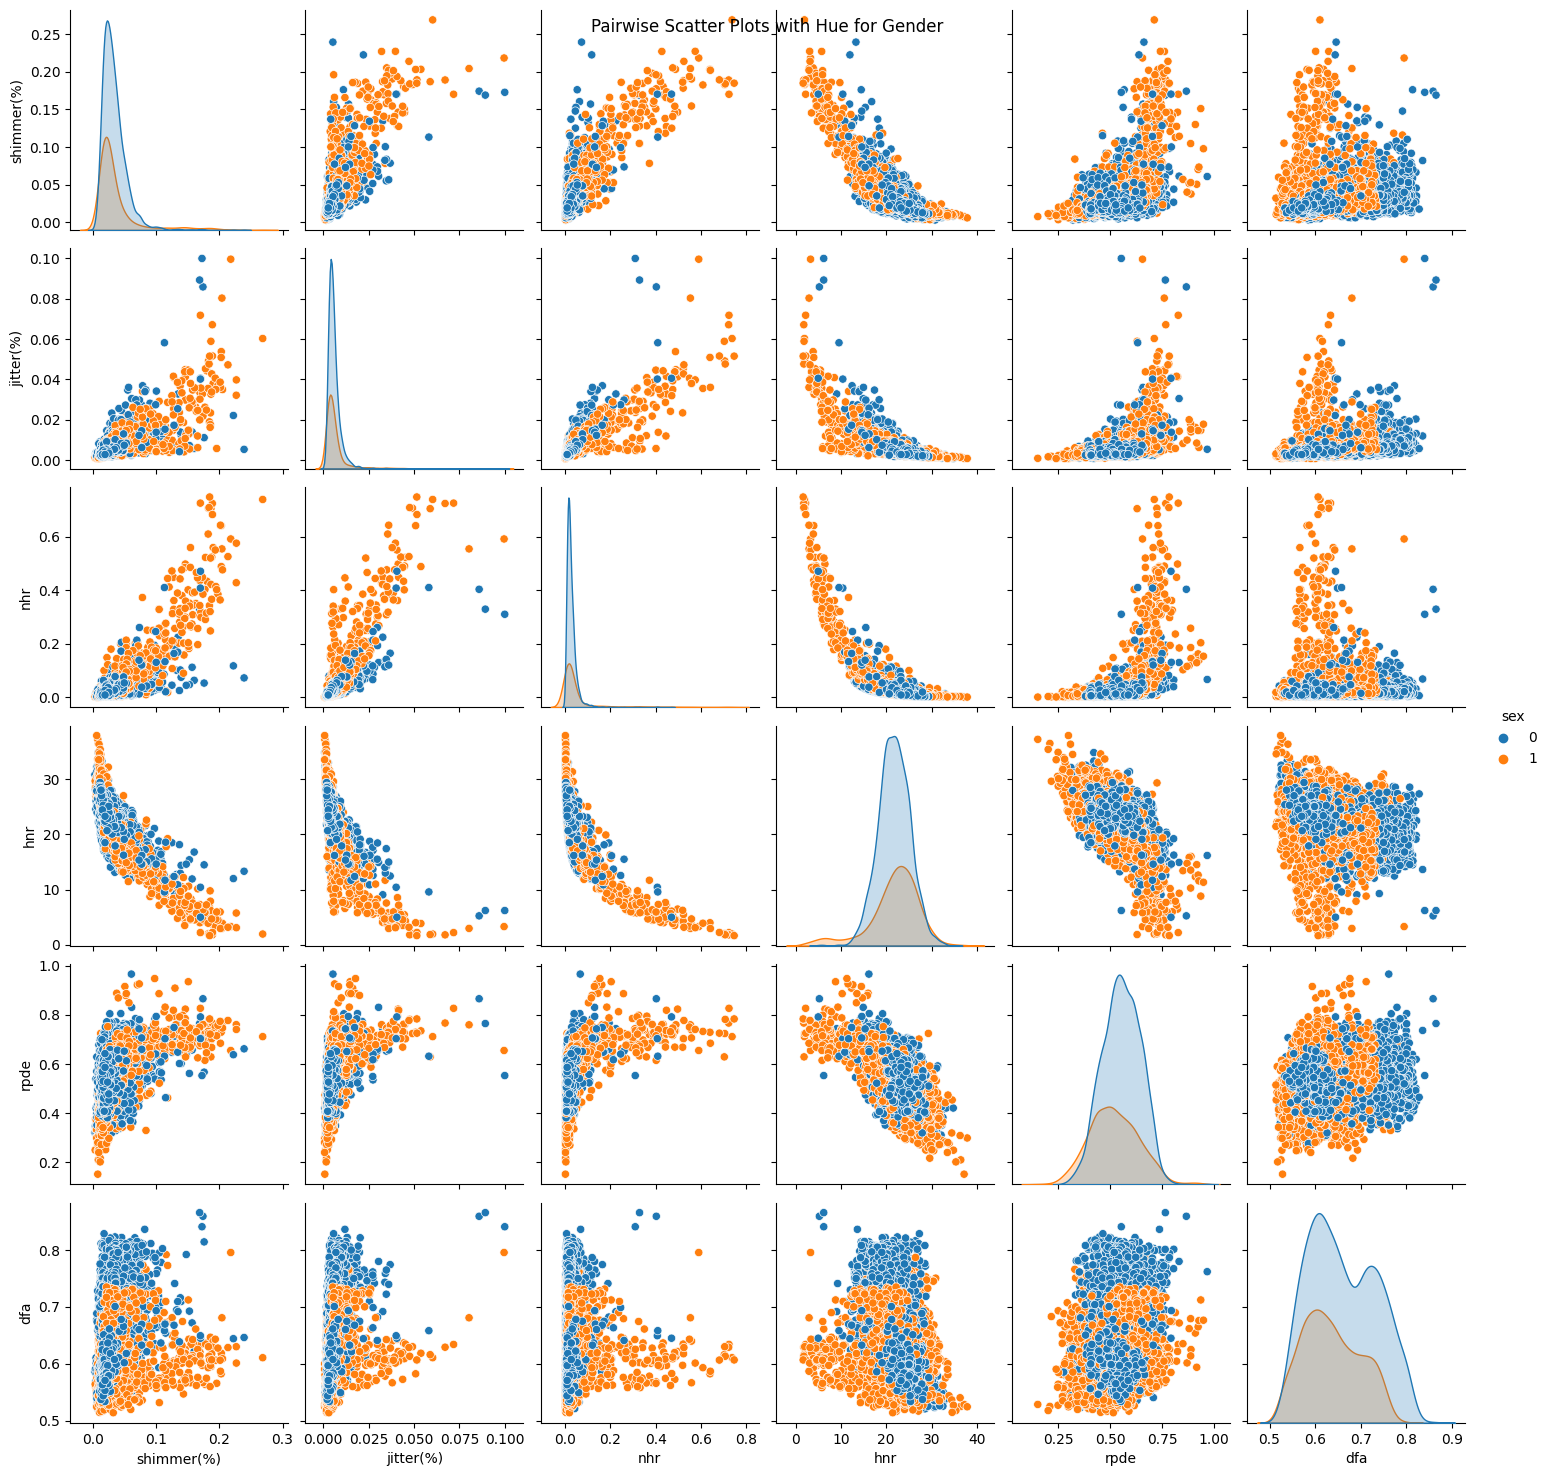

In [62]:
sns.pairplot(df_csv, x_vars=['shimmer(%)', 'jitter(%)', 'nhr', 'hnr', 'rpde', 'dfa'], y_vars=['shimmer(%)', 'jitter(%)', 'nhr', 'hnr', 'rpde', 'dfa'], hue='sex', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots with Hue for Gender')
plt.show()

<Axes: xlabel='nhr', ylabel='hnr'>

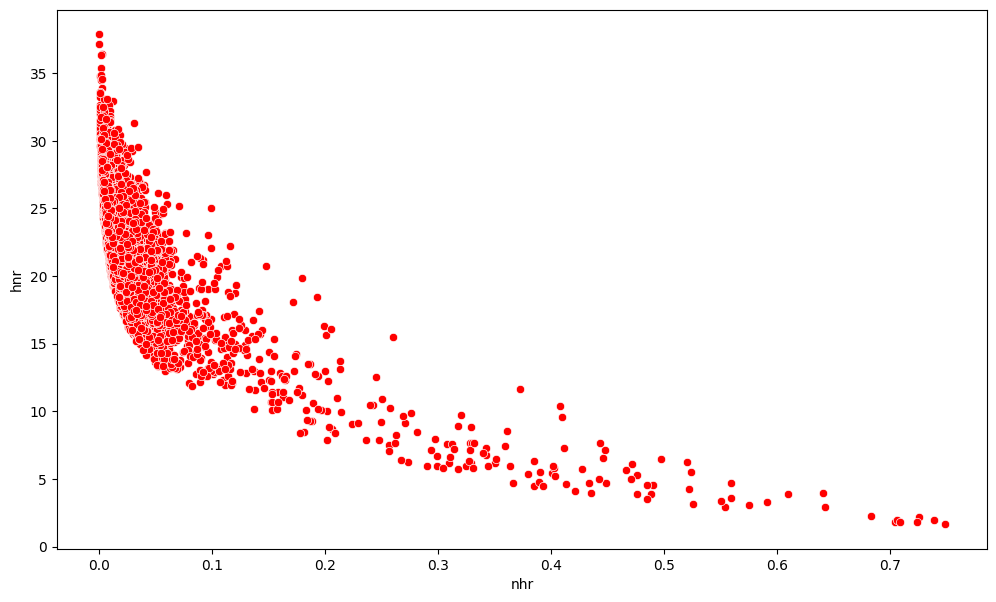

In [188]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_csv,x='nhr',y='hnr',color='red')

## **Relationships between shimmen, jitter, and other voice related features like NHR, HNR, RPDE, DFA**

In [90]:
df_csv[['shimmer(%)','jitter(%)','nhr','hnr','rpde','dfa']].corr()

,shimmer(%),jitter(%),nhr,hnr,rpde,dfa
shimmer(%),1.000000,0.709791,0.795158,-0.801416,0.468235,0.132540
jitter(%),0.709791,1.000000,0.825294,-0.675188,0.427128,0.226550
nhr,0.795158,0.825294,1.000000,-0.684412,0.416660,-0.022088
hnr,-0.801416,-0.675188,-0.684412,1.000000,-0.659053,-0.290519
rpde,0.468235,0.427128,0.416660,-0.659053,1.000000,0.192030
dfa,0.132540,0.226550,-0.022088,-0.290519,0.192030,1.000000


<Axes: >

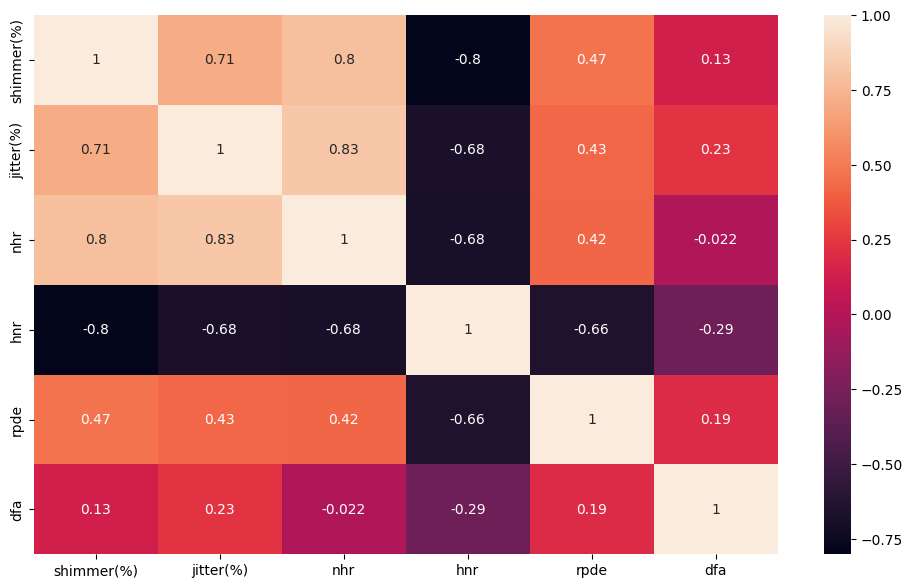

In [92]:
plt.figure(figsize=(12,7))
sns.heatmap(df_csv[['shimmer(%)','jitter(%)','nhr','hnr','rpde','dfa']].corr(),annot=True)

## **Model building to predit the motor_updrs**

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression

In [97]:
df_csv.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe'],
      dtype='object')

In [ ]:
# df_csv=df_csv.drop(columns=['subject#','age','sex','test_time','rpde','dfa','ppe'])

In [98]:
df_csv

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
# target=df_csv[['motor_updrs','total_updrs']]

In [ ]:
# target

,motor_updrs,total_updrs
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375
...,...,...
5870,22.485,33.485
5871,21.988,32.988
5872,21.495,32.495
5873,21.007,32.007


# **Linear Regression Model**

In [99]:
#splitting dataset
X_train,x_test,y_train,y_test=train_test_split(df_csv.drop(columns=['motor_updrs']),df_csv['motor_updrs'],test_size=0.3,random_state=42)

In [100]:
X_train.shape

(4112, 21)

In [101]:
y_train.shape

(4112,)

In [102]:
x_test.shape

(1763, 21)

In [103]:
y_test.shape

(1763,)

In [104]:
#creating linear regression object
lr=LinearRegression()

In [105]:
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
lr_pred=lr.predict(x_test)

In [107]:
lr_pred

array([30.75705813, 10.50348337, 10.38748174, ..., 21.86375895,
       31.87393074, 13.93953558])

In [119]:
from sklearn.metrics import r2_score, mean_squared_error

In [120]:
print(r2_score(lr_pred,y_test))

0.8934678673151881


In [121]:
mean_squared_error(lr_pred,y_test)

6.276355054938698

In [117]:
lr.score(X_train,y_train)

0.9062563772399819

In [118]:
lr.score(x_test,y_test)

0.9036977531035865

## Hyperparameter tuning for Linear Regression

In [133]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [139]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [140]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [141]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [142]:
lr=LinearRegression(copy_X=True,fit_intercept=True,positive=False)

In [143]:
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
lr.score(X_train,y_train)

0.9062563772399819

In [145]:
lr.score(x_test,y_test)

0.9036977531035865

In [146]:
r2_score(lr.predict(x_test),y_test)

0.8934678673151881

In [147]:
print(mean_squared_error(lr.predict(x_test),y_test))

6.276355054938698


## Model building to predit the total_updrs

In [171]:
x_train, x_test, y_train, y_test=train_test_split(df_csv.drop(columns=['total_updrs']),df_csv['total_updrs'],test_size=0.3)

In [172]:
lr=LinearRegression()

In [173]:
lr.fit(x_train,y_train)

LinearRegression()

In [174]:
lr.score(x_train, y_train)

0.9102809356125516

In [175]:
lr.score(x_test,y_test)

0.908794443125078

In [178]:
y_pred=lr.predict(x_test)

In [176]:
r2_score(lr.predict(x_test),y_test)

0.900623753268414

In [177]:
mean_squared_error(lr.predict(x_test),y_test)

10.785030737159689

### Create a scatter plot of actual vs. predicted.

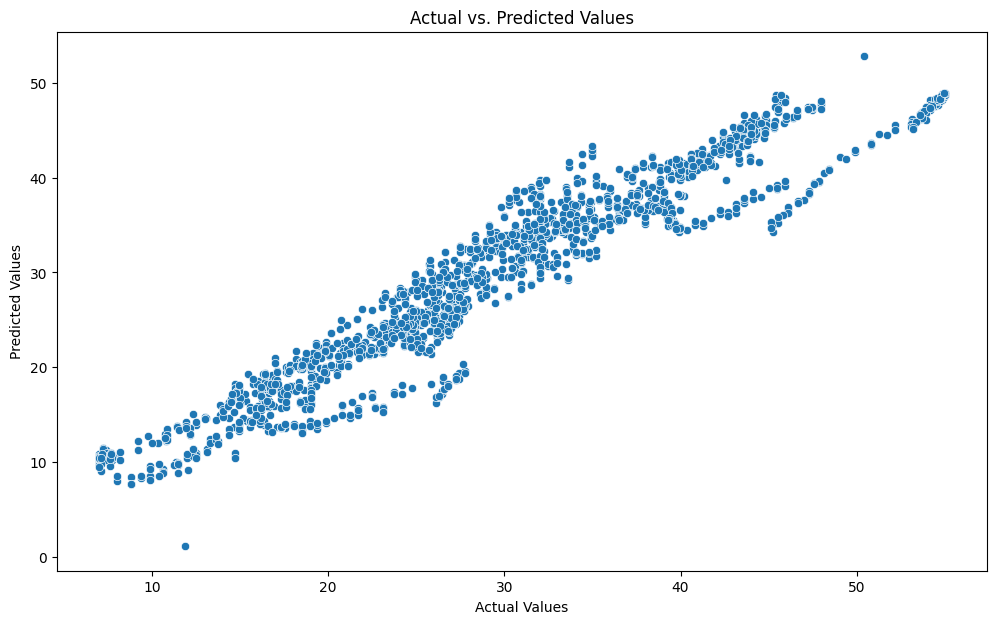

In [187]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [207]:
from sklearn.decomposition import PCA

In [208]:
pca=PCA(n_components=14)

In [211]:
x_train_pca=pca.fit_transform(x_train)

In [212]:
x_test_pca=pca.transform(x_test)

In [213]:
x_train_pca

array([[ 2.69909994e+01, -1.29795496e+01, -1.64973399e+01, ...,
         2.77120181e-03,  2.28267725e-03,  1.47431263e-03],
       [ 2.83727942e+00,  8.96723501e+00,  1.26897730e+01, ...,
        -2.92620166e-03, -5.60974092e-03, -1.40011846e-03],
       [ 3.86769394e+00, -1.40337150e+01, -3.16122272e+00, ...,
         7.13189015e-04,  4.74388018e-03, -1.17342814e-04],
       ...,
       [-6.42449536e+01, -1.47364502e+01, -6.29825082e+00, ...,
         1.31427254e-03,  1.13445277e-03, -3.95911621e-04],
       [-2.46971339e+01, -4.11009535e+00,  3.05135572e+00, ...,
         6.82609981e-04, -2.06483172e-03, -2.33930255e-03],
       [-7.82536942e+01, -1.48944739e+01, -6.08910953e+00, ...,
        -1.25564757e-03, -2.32130536e-03, -1.36347914e-03]])

In [214]:
x_test_pca

array([[-4.67634535e+01,  1.34506371e+01,  4.44896021e+00, ...,
         3.60256209e-03,  2.29496309e-03, -3.80096603e-03],
       [ 7.57250813e+01, -1.65599290e+01, -3.72130277e+00, ...,
        -1.12531667e-02,  1.52638933e-03,  1.85112500e-03],
       [ 2.32205502e+01,  1.20863978e+01,  6.42223742e+00, ...,
         2.75138276e-03,  2.11557291e-03, -2.54179499e-03],
       ...,
       [ 4.12676440e+01,  2.26672684e+01, -7.03125647e+00, ...,
         1.05927249e-02,  3.38385548e-03, -3.78601704e-03],
       [-6.61317965e+01, -1.29369921e+01, -4.57358623e+00, ...,
         6.60443328e-04,  1.41303639e-03, -1.58617108e-03],
       [ 5.69912884e+01,  7.40572052e+00, -1.05593385e+01, ...,
        -8.34895396e-04,  8.18941426e-03,  1.57297568e-03]])

In [215]:
lr.fit(x_train_pca,y_train)

LinearRegression()

In [216]:
lr.score(x_train_pca,y_train)

0.9089517789031679

In [217]:
lr.predict(x_test_pca)

array([34.86859858, 20.05432538, 31.65277673, ..., 47.18102852,
       35.77499139, 33.73062962])

In [219]:
lr.score(x_test_pca,y_test)

0.9078094739176089

In [223]:
df_txt['UPDRS'].describe()

count    1040.000000
mean       13.000000
std        15.894745
min         1.000000
25%         1.000000
50%         3.000000
75%        23.250000
max        55.000000
Name: UPDRS, dtype: float64

In [222]:
x_train

,subject#,age,sex,test_time,motor_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
636,5,75,0,119.380,31.989,0.00630,0.000059,0.00334,0.00335,0.01003,0.02542,0.233,0.01303,0.01549,0.02238,0.03909,0.028383,20.153,0.65375,0.59971,0.25825
4113,30,49,0,95.308,25.242,0.00327,0.000038,0.00110,0.00157,0.00331,0.01282,0.115,0.00554,0.00689,0.00958,0.01663,0.016294,19.284,0.68184,0.72685,0.12177
874,6,63,0,96.344,26.238,0.00269,0.000020,0.00122,0.00155,0.00365,0.02052,0.179,0.01070,0.01282,0.01948,0.03209,0.006531,24.961,0.50115,0.61136,0.14055
1422,10,58,0,171.480,16.149,0.00880,0.000082,0.00495,0.00383,0.01485,0.04276,0.373,0.02531,0.02159,0.02933,0.07592,0.040043,21.578,0.53653,0.65097,0.25369
3918,29,78,0,156.390,23.998,0.00391,0.000024,0.00154,0.00212,0.00462,0.03390,0.300,0.01663,0.01977,0.02962,0.04988,0.019483,25.013,0.48946,0.61031,0.13605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,5,75,0,84.392,31.000,0.00354,0.000028,0.00168,0.00219,0.00503,0.03045,0.281,0.01594,0.01871,0.02651,0.04781,0.013284,22.085,0.56362,0.59660,0.18287
1525,11,55,0,35.450,19.170,0.00297,0.000023,0.00119,0.00158,0.00358,0.01670,0.145,0.00783,0.00999,0.01849,0.02350,0.005048,25.469,0.42125,0.61254,0.14084
990,7,72,0,28.314,15.913,0.00613,0.000067,0.00270,0.00320,0.00810,0.02187,0.186,0.01079,0.01296,0.01707,0.03238,0.021474,19.174,0.57101,0.63160,0.25744
2768,20,67,0,67.890,10.768,0.00571,0.000043,0.00245,0.00315,0.00736,0.03588,0.321,0.01921,0.02341,0.02649,0.05763,0.016874,21.469,0.43212,0.77388,0.19316


In [220]:
lr.predict(df_txt)

array([ 217.83713588,  123.76508589,  199.99264408, ..., -103.52637352,
        -30.27954836, -133.54209408])